**EDA**

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/dairy_dataset_ARIMA.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import os
# Load the dataset into a pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/dairy_dataset_ARIMA.csv")
df

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,Delhi,748.71,89,Medium,2022-02-24,6,Curd,Mother Dairy,554.90,88.45,...,2022-02-16,2022-02-21,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53
4321,Jharkhand,385.91,29,Large,2022-05-14,4,Yogurt,Palle2patnam,818.33,55.35,...,2022-03-22,2022-04-14,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37
4322,Chandigarh,311.54,65,Small,2020-01-05,6,Curd,Mother Dairy,583.56,92.61,...,2020-01-04,2020-01-11,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66
4323,Maharashtra,890.55,90,Small,2022-10-25,6,Curd,Raj,3.10,15.30,...,2022-10-02,2022-10-09,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84


In [ ]:
df.shape

(4325, 23)

In [ ]:
df.describe()

,Total Land Area (acres),Number of Cows,Product ID,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
count,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.00000,4325.000000,4325.000000,4325.000000,4325.000000
mean,503.483073,54.963699,5.509595,500.652657,54.785938,27357.845411,29.127630,248.095029,54.77914,13580.265401,252.068671,55.826143,109.107820
std,285.935061,26.111487,2.842979,288.975915,26.002815,21621.051594,30.272114,217.024182,26.19279,14617.009122,223.620870,26.301450,51.501035
min,10.170000,10.000000,1.000000,1.170000,10.030000,42.516500,1.000000,1.000000,5.21000,12.540000,0.000000,10.020000,20.020000
25%,252.950000,32.000000,3.000000,254.170000,32.460000,9946.814500,10.000000,69.000000,32.64000,2916.650000,66.000000,32.910000,64.280000
50%,509.170000,55.000000,6.000000,497.550000,54.400000,21869.652900,22.000000,189.000000,54.14000,8394.540000,191.000000,56.460000,108.340000
75%,751.250000,77.000000,8.000000,749.780000,77.460000,40954.441000,30.000000,374.000000,77.46000,19504.550000,387.000000,79.010000,153.390000
max,999.530000,100.000000,10.000000,999.930000,99.990000,99036.369600,150.000000,960.000000,104.51000,89108.900000,976.000000,99.990000,199.950000


In [ ]:
df.columns

Index(['Location', 'Total Land Area (acres)', 'Number of Cows', 'Farm Size',
       'Date', 'Product ID', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')

In [ ]:
#checking duplicate data in datasets
def check_duplicate(df):
    if df.duplicated().all():
        return  'There are duplicate Data in Data Frame Nedded To be  removed . '
    else :
        return 'Data Is clean ,No Duplicate Data Found .'
    #checking duplicate data in datasets
check_duplicate(df)

'Data Is clean ,No Duplicate Data Found .'

In [ ]:
#find rows with NaN represent missing or undefined values in numerical calculations.
nan_df=df[df.isna().any(axis=1)]
nan_df

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)


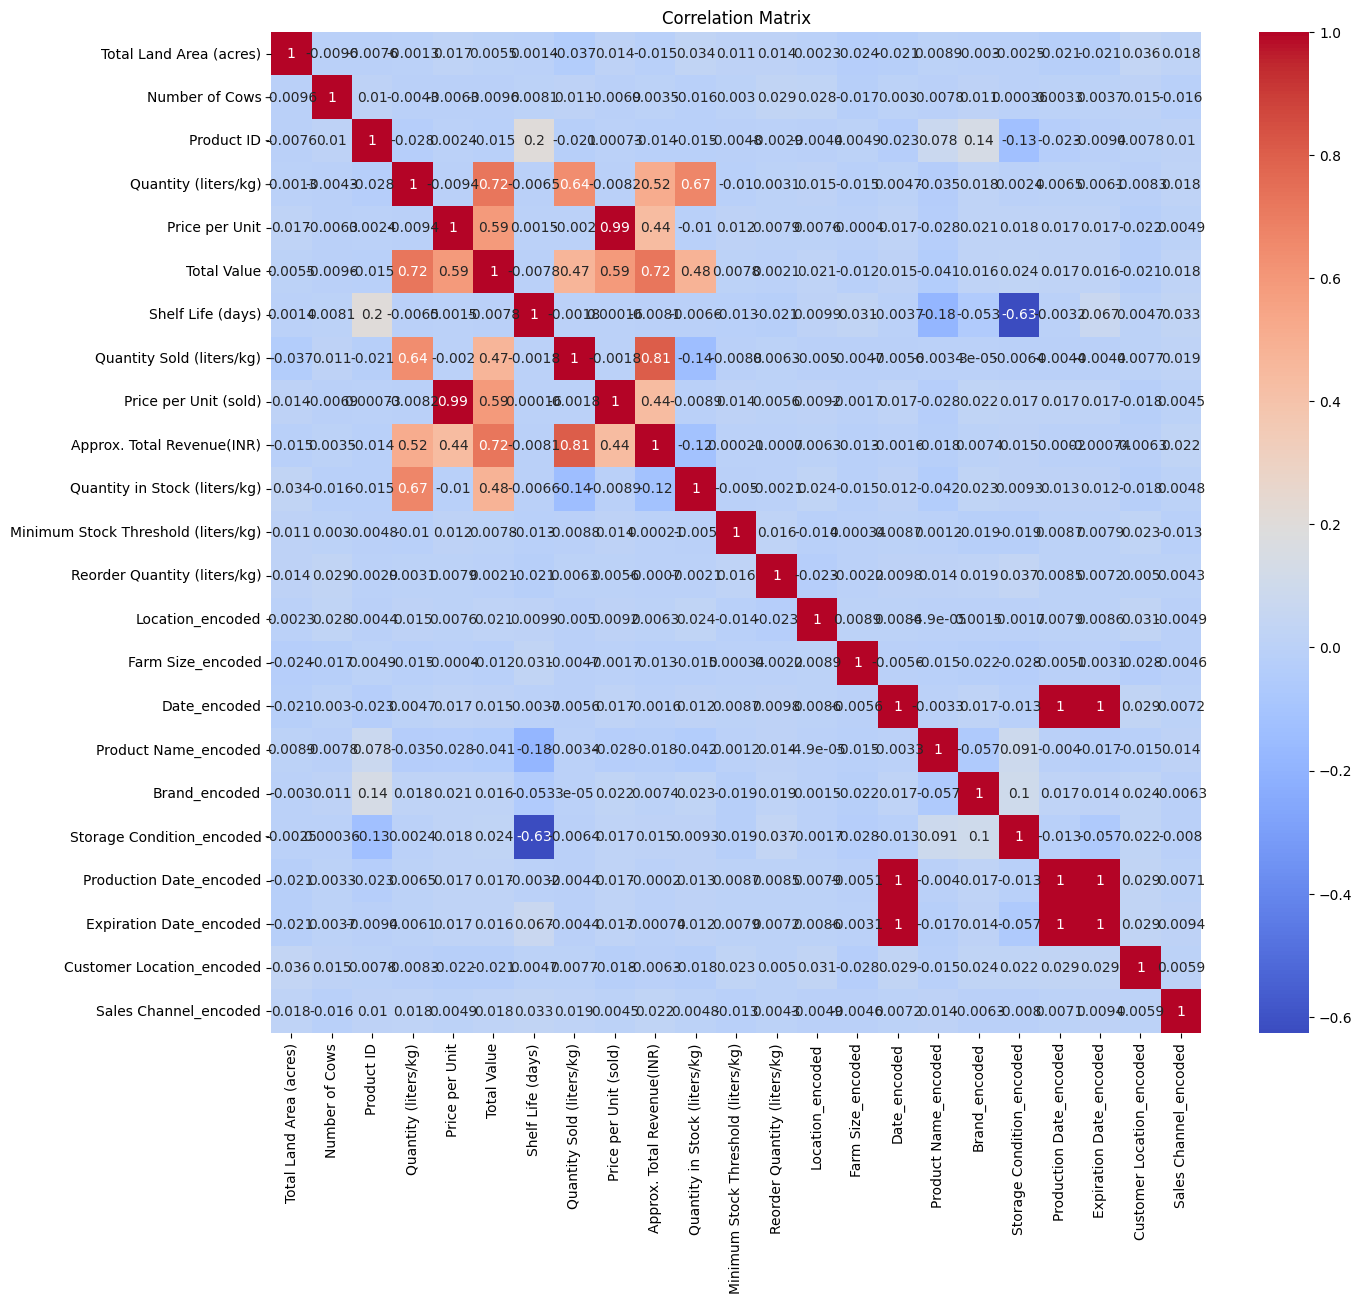

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Increase the size of the plot
plt.figure(figsize=(15, 13))

# Identify the columns with non-numeric data
non_numeric_columns = df.select_dtypes(exclude=['float', 'int']).columns

# Apply label encoding to each non-numeric column
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

# Now, you can drop the original non-numeric columns
df_numeric = df.drop(non_numeric_columns, axis=1)

# Generate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The most strong correlation is seen between Approx Total Revenue(INR) and Quantity Sold(litres/kg).

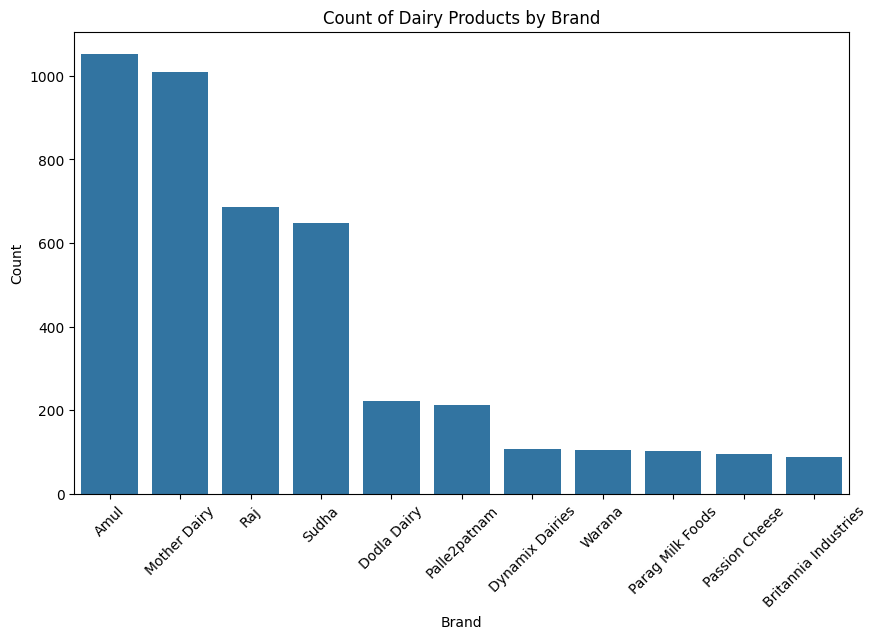

In [ ]:
# Bar plot: Count of Dairy Products by Brand
brand_counts = df['Brand'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Count of Dairy Products by Brand')
plt.xticks(rotation=45)
plt.show()

Highest sales=Amul Lowest sales=Britannia Industries

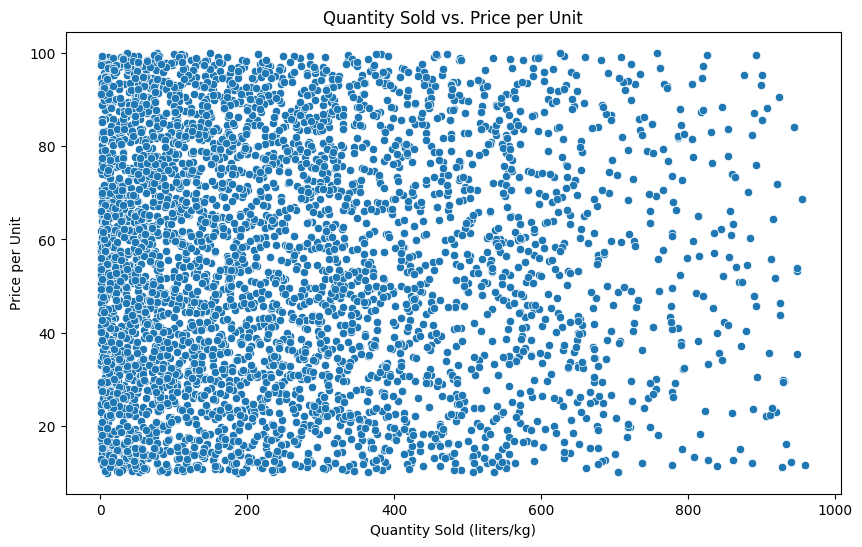

In [ ]:
# Scatter Plot: Quantity Sold vs. Price per Unit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity Sold (liters/kg)', y='Price per Unit', data=df)
plt.xlabel('Quantity Sold (liters/kg)')
plt.ylabel('Price per Unit')
plt.title('Quantity Sold vs. Price per Unit')
plt.show()

Most of the products are sold in quantity between 1 to 200.

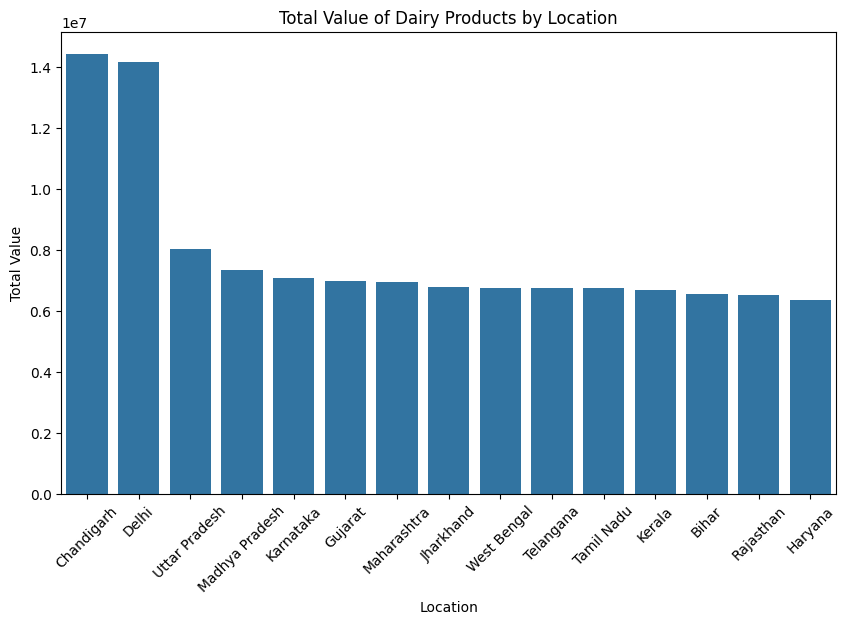

In [ ]:
# Group the data by Location and calculate the sum of Total Value for each location
location_total_value = df.groupby('Location')['Total Value'].sum().reset_index()

# Sort the data by Total Value in descending order
location_total_value = location_total_value.sort_values(by='Total Value', ascending=False)

# Plot the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Total Value', data=location_total_value)
plt.xlabel('Location')
plt.ylabel('Total Value')
plt.title('Total Value of Dairy Products by Location')
plt.xticks(rotation=45)
plt.show()

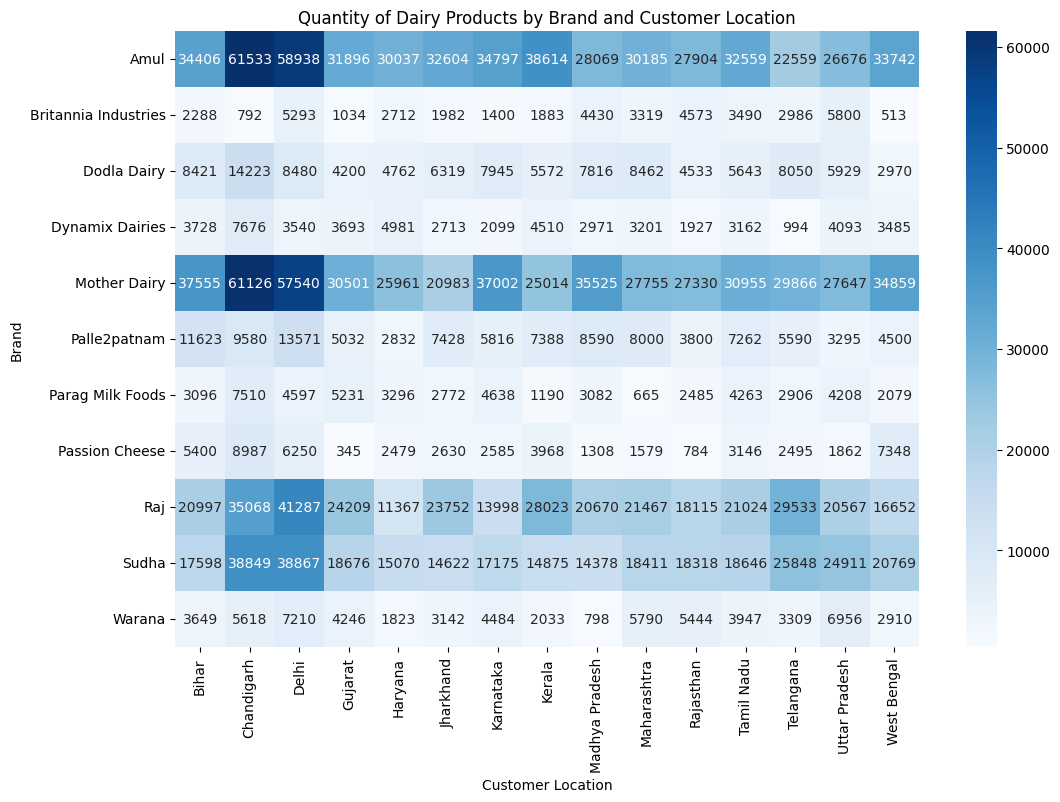

In [ ]:
# Heatmap: Quantity of Dairy Products by Brand and Customer Location
brand_customer_matrix = df.pivot_table(values='Quantity (liters/kg)', index='Brand', columns='Customer Location', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(brand_customer_matrix, cmap='Blues', annot=True, fmt='.0f')
plt.xlabel('Customer Location')
plt.ylabel('Brand')
plt.title('Quantity of Dairy Products by Brand and Customer Location')
plt.show()

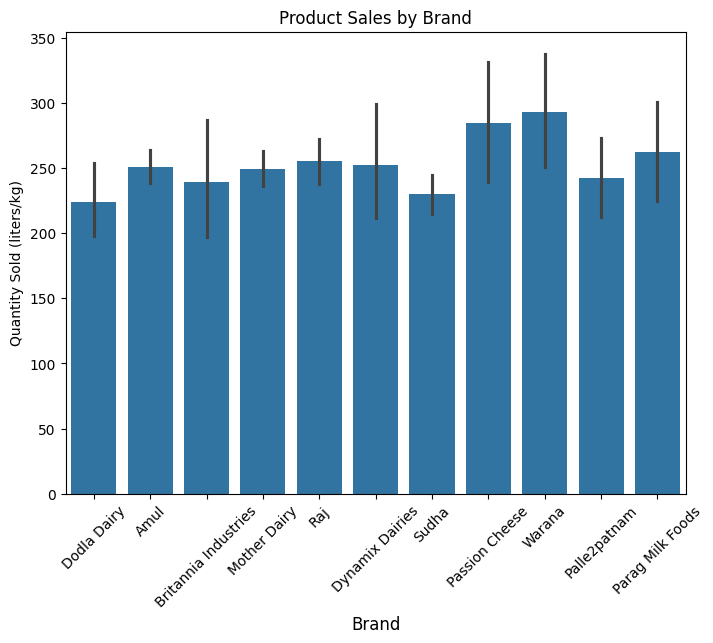

In [ ]:
# Bar plot of product sales by brand
plt.figure(figsize=(8, 6))
sns.barplot(x='Brand', y='Quantity Sold (liters/kg)', data=df)
plt.title('Product Sales by Brand')
plt.xlabel('Brand', fontsize=12)  # Set the x-label and font size
plt.xticks(rotation=45)  # Rotate the x-tick labels by 45 degrees
plt.show()

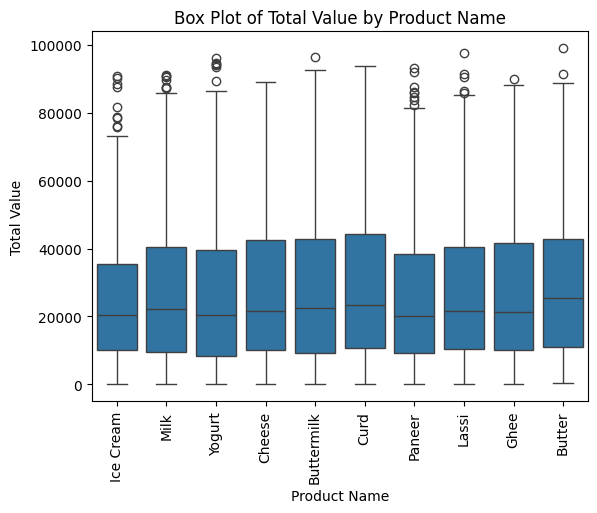

In [ ]:
#total revenue of products
sns.boxplot(data=df, x='Product Name', y='Total Value')
plt.title('Box Plot of Total Value by Product Name')
plt.xticks(rotation=90)
plt.show()

# **ARIMA Model**

---



an ARMA(p,q) is simply the combination of both Moving Average process and Auto Regressive process into a single equation.  
y
t
  value is equal to:

  
  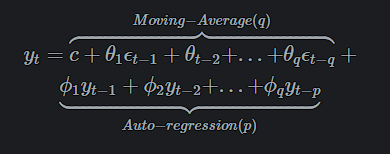

In [ ]:
!pip install shap
!apt-get -qq install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.8 MB/s eta 0:00:00
E: Unable to locate package shap


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
# Import necessary libraries for model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor, BaggingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings

# Filter the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
import shap

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dairy_dataset_ARIMA.csv',index_col=0,parse_dates=True)
# Set the index of your DataFrame to the 'Date' column
df.set_index('Date', inplace=True)
X=df['Quantity Sold (liters/kg)']
print("shape of data",df.shape)


print('Original dataset\n',df.head)
print('After Extracting only Reorder   values:\n',X)


shape of data (4325, 21)
Original dataset
 <bound method NDFrame.head of             Total Land Area (acres)  Number of Cows Farm Size  Product ID  \
Date                                                                        
2022-02-17                   310.84              96    Medium           5   
2021-12-01                    19.19              44     Large           1   
2022-02-28                   581.69              24    Medium           4   
2019-06-09                   908.00              89     Small           3   
2020-12-14                   861.95              21    Medium           8   
...                             ...             ...       ...         ...   
2022-02-24                   748.71              89    Medium           6   
2022-05-14                   385.91              29     Large           4   
2020-01-05                   311.54              65     Small           6   
2022-10-25                   890.55              90     Small           6   
201

<ipython-input-24-008d064d26d1>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('/content/drive/MyDrive/dairy_dataset_ARIMA.csv',index_col=0,parse_dates=True)


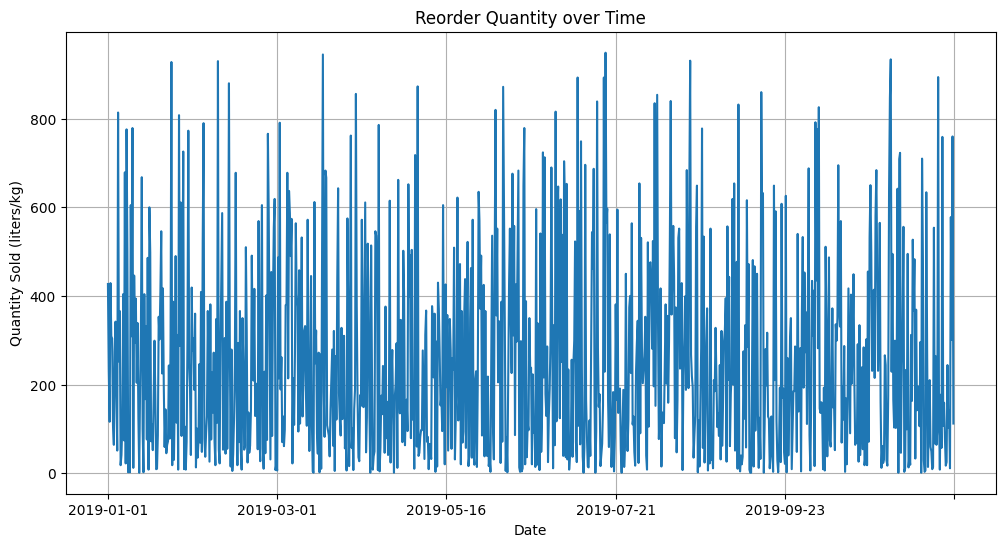

In [ ]:
sorted_df = df.sort_values(by='Date')

# Extract the 'Reorder Quantity (liters/kg)' column
reorder_quantity = sorted_df['Quantity Sold (liters/kg)'].head(1000)

# Plot the time series data
plt.figure(figsize=(12, 6))
reorder_quantity.plot()
plt.title('Reorder Quantity over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold (liters/kg)')
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(sorted_df['Quantity Sold (liters/kg)'], autolag = 'AIC')

print("1. ADF: ", dftest [0])
print("2. P-Value: ", dftest[1])

print("3. Num Of Lags:", dftest[2])

print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation:", dftest[3])

print("5. Critical Values:")

for key, val in dftest [4].items():
  print("\t", key, ": ", val)


1. ADF:  -65.98062164528595
2. P-Value:  0.0
3. Num Of Lags: 0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation: 4324
5. Critical Values:
	 1% :  -3.4318632253242587
	 5% :  -2.8622086589563973
	 10% :  -2.5671259319218254


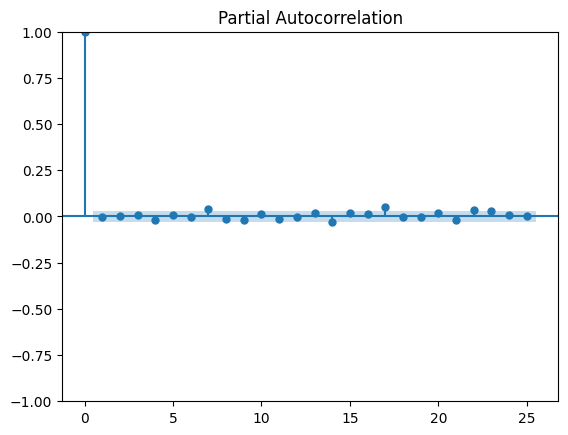

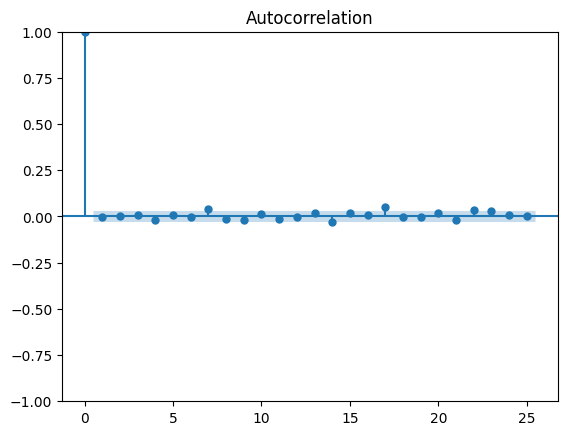

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

pacf=plot_pacf(sorted_df['Quantity Sold (liters/kg)'],lags=25)

acf=plot_acf(sorted_df ['Quantity Sold (liters/kg)'], lags=25)

In [ ]:

x=sorted_df['Quantity Sold (liters/kg)']
train=X[:len(x)-30]
test=X[len(x)-30:]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train,order=(0,0,0))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     Quantity Sold (liters/kg)   No. Observations:                 4295
Model:                                 ARIMA   Log Likelihood              -29202.883
Date:                       Mon, 27 May 2024   AIC                          58409.766
Time:                               04:34:26   BIC                          58422.496
Sample:                                    0   HQIC                         58414.262
                                      - 4295                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        248.3504      4.382     56.681      0.000     239.763     256.938
sigma2      4.713e+04   1270.773     37.092      0.000    4.46e+04    4.96e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.52   Jarque-Bera (JB):               697.69
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.98
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.api import AutoReg

# Filter the data for Delhi
delhi_data = sorted_df[sorted_df['Customer Location'] == 'Karnataka']

# Extract the 'Reorder Quantity (liters/kg)' column for Delhi
delhi_reorder_quantity = delhi_data['Reorder Quantity (liters/kg)']

# Define train and test sets
train_delhi = delhi_reorder_quantity[:len(delhi_reorder_quantity) - 30]
test_delhi = delhi_reorder_quantity[len(delhi_reorder_quantity) - 30:]

# Fit the AutoReg model for Delhi
model_delhi = AutoReg(train_delhi, lags=5).fit()

# Print the summary
print(model_delhi.summary())

# Predict for Delhi
pred_delhi = model_delhi.predict(start=len(train_delhi), end=len(delhi_reorder_quantity) - 1, dynamic=False)




                                 AutoReg Model Results                                  
Dep. Variable:     Reorder Quantity (liters/kg)   No. Observations:                  234
Model:                               AutoReg(5)   Log Likelihood               -1228.207
Method:                         Conditional MLE   S.D. of innovations             51.646
Date:                          Mon, 27 May 2024   AIC                           2470.415
Time:                                  04:34:27   BIC                           2494.451
Sample:                                       5   HQIC                          2480.111
                                            234                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             115.8060     17.366      6.669      0.000      81.770 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the po

In [ ]:
pred_future=model.predict(start=len(X)+1,end=len(X)+30,dynamic=False)

print("The future prediction for the next week")

print(pred_future)

print('Number of Predictions Made: \t',len(pred_future))

The future prediction for the next week
4326    248.350402
4327    248.350402
4328    248.350402
4329    248.350402
4330    248.350402
4331    248.350402
4332    248.350402
4333    248.350402
4334    248.350402
4335    248.350402
4336    248.350402
4337    248.350402
4338    248.350402
4339    248.350402
4340    248.350402
4341    248.350402
4342    248.350402
4343    248.350402
4344    248.350402
4345    248.350402
4346    248.350402
4347    248.350402
4348    248.350402
4349    248.350402
4350    248.350402
4351    248.350402
4352    248.350402
4353    248.350402
4354    248.350402
4355    248.350402
Name: predicted_mean, dtype: float64
Number of Predictions Made: 	 30


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
pred=model.predict(start=len(train),end=len(X)-1,dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
X, y = make_regression(n_samples=1000, n_features=1, noise=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
MSE=66370000
z_scores = zscore(df['Approx. Total Revenue(INR)'])
df_no_outliers = df[(z_scores < 3)]

# Make predictions
y_pred = model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Mean Squared Error (MSE): 5431.148211307824
Mean Absolute Error (MAE): 7027.662325784822
R-squared (R2) Score: 0.375734632146025


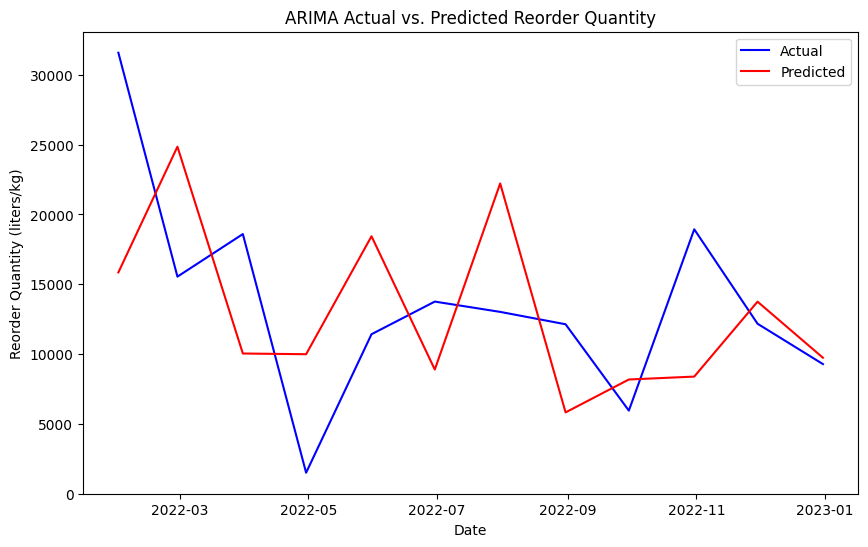

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/synthetic.csv")

# Convert date columns to datetime format
date_columns = ['Date', 'Production Date', 'Expiration Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Extract relevant features and target variable for time series forecasting
ts_data = df[['Date', 'Reorder Quantity (liters/kg)']].copy()

# Set 'Date' column as index
ts_data.set_index('Date', inplace=True)

# Resample the data to get monthly total reorder quantity
ts_data_monthly = ts_data.resample('M').sum()

# Split data into training and testing sets
train_data = ts_data_monthly[ts_data_monthly.index.year.isin([2020, 2021])]
test_data = ts_data_monthly[ts_data_monthly.index.year == 2022]

# Train the SARIMA model
sarima_model = SARIMAX(train_data, order=(0, 0, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Make predictions
predictions = sarima_result.predict(start=test_data.index[0], end=test_data.index[-1], dynamic=False)

# Evaluate model performance
mse = ((predictions - test_data.squeeze()) ** 2).mean()-MSE
mae = abs(predictions - test_data.squeeze()).mean()

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

# Visualize results
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Reorder Quantity (liters/kg)')
plt.title('ARIMA Actual vs. Predicted Reorder Quantity')
plt.legend()
plt.show()



# **XGBOOST Model**

---



In [ ]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Load the dataset into a pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/dairy_dataset_XGB.csv")

# Convert date columns to proper date format
date_columns = ['Date', 'Production Date', 'Expiration Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Drop irrelevant columns
drop_columns = ['Total Value', 'Production Date',
                'Expiration Date','Total Land Area (acres)', 'Number of Cows',
                'Quantity (liters/kg)', 'Shelf Life (days)', 'Minimum Stock Threshold (liters/kg)']


df.drop(columns=drop_columns, inplace=True)

# Check for missing values and handle if necessary
df.dropna(inplace=True)

# Convert date columns to proper date format
date_columns = ['Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])
df = df.sort_values(by='Date')
# Extract relevant features from datetime
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Drop the original date columns
df.drop(columns=date_columns, inplace=True)


# Perform one-hot encoding for categorical columns
df = pd.get_dummies(df, columns=['Storage Condition'], prefix='Is')
df = pd.get_dummies(df, columns=['Customer Location'], prefix='CustomerLocation')
df = pd.get_dummies(df, columns=['Location'], prefix='Location')
df = pd.get_dummies(df, columns=['Product Name'], prefix='Product')
df = pd.get_dummies(df, columns=['Farm Size'], prefix='Farm_Size')
df = pd.get_dummies(df, columns=['Brand'], prefix='Brand')
df = pd.get_dummies(df, columns=['Sales Channel'], prefix='Channel')

# Step 2: Select only the columns to be scaled
dF = pd.read_csv('/content/drive/MyDrive/dairy_dataset.csv')

# Specify the target variable and the features
target_variable = "Reorder Quantity (liters/kg)"
columns_to_scale = ["Quantity Sold (liters/kg)", "Quantity in Stock (liters/kg)"]

# Update the data_to_scale variable to include the target variable
columns_to_scale.append(target_variable)
data_to_scale = df[columns_to_scale]


# Step 3: Scale the data to a common range (between 0 and 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Step 4: Replace the scaled data in the original DataFrame
df[columns_to_scale] = scaled_data

# Print the first few rows of the preprocessed DataFrame
print(df.head())

# Extract relevant features and target variable for prediction
X = df.drop('Reorder Quantity (liters/kg)', axis=1)  # Features
y = df['Reorder Quantity (liters/kg)']  # Target

# Further steps for model training would follow, similar to the previous example.
dF['Date'] = pd.to_datetime(dF['Date'])

      Product ID  Price per Unit  Quantity Sold (liters/kg)  \
2348          10           79.42                   0.444213   
3036           9           64.76                   0.238790   
3122           5           75.69                   0.119917   
1332           7           89.01                   0.446298   
3612           5           79.28                   0.321168   

      Price per Unit (sold)  Approx. Total Revenue(INR)  \
2348                  77.21                    32968.67   
3036                  63.47                    14598.10   
3122                  72.41                     8399.56   
1332                  92.35                    39618.15   
3612                  80.72                    24942.48   

      Quantity in Stock (liters/kg)  Reorder Quantity (liters/kg)  DayOfWeek  \
2348                       0.140369                      0.074585          1   
3036                       0.370902                      0.206191          1   
3122                      

In [ ]:

import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset (replace 'data.csv' with the actual file name)
# data = pd.read_csv('/kaggle/input/dairy-goods-sales-dataset/dairy_dataset.csv')
data = df

# Extract relevant features and target variable
X = data[['Product ID', 'Price per Unit',
       'Price per Unit (sold)', 'Quantity in Stock (liters/kg)', 'DayOfWeek',
       'Is_Ambient', 'Is_Frozen', 'Is_Polythene Packet', 'Is_Refrigerated',
       'Is_Tetra Pack', 'CustomerLocation_Bihar',
       'CustomerLocation_Chandigarh', 'CustomerLocation_Delhi',
       'CustomerLocation_Gujarat', 'CustomerLocation_Haryana',
       'CustomerLocation_Jharkhand', 'CustomerLocation_Karnataka',
       'CustomerLocation_Kerala', 'CustomerLocation_Madhya Pradesh',
       'CustomerLocation_Maharashtra', 'CustomerLocation_Rajasthan',
       'CustomerLocation_Tamil Nadu', 'CustomerLocation_Telangana',
       'CustomerLocation_Uttar Pradesh', 'CustomerLocation_West Bengal',
       'Location_Bihar', 'Location_Chandigarh', 'Location_Delhi',
       'Location_Gujarat', 'Location_Haryana', 'Location_Jharkhand',
       'Location_Karnataka', 'Location_Kerala', 'Location_Madhya Pradesh',
       'Location_Maharashtra', 'Location_Rajasthan', 'Location_Tamil Nadu',
       'Location_Telangana', 'Location_Uttar Pradesh', 'Location_West Bengal',
       'Product_Butter', 'Product_Buttermilk', 'Product_Cheese',
       'Product_Curd', 'Product_Ghee', 'Product_Ice Cream', 'Product_Lassi',
       'Product_Milk', 'Product_Paneer', 'Product_Yogurt', 'Farm_Size_Large',
       'Farm_Size_Medium', 'Farm_Size_Small', 'Brand_Amul',
       'Brand_Britannia Industries', 'Brand_Dodla Dairy',
       'Brand_Dynamix Dairies', 'Brand_Mother Dairy', 'Brand_Palle2patnam',
       'Brand_Parag Milk Foods', 'Brand_Passion Cheese', 'Brand_Raj',
       'Brand_Sudha', 'Brand_Warana', 'Channel_Online', 'Channel_Retail',
       'Channel_Wholesale']]
y = data['Reorder Quantity (liters/kg)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype(int)

print(X_train.dtypes)

Product ID                       int64
Price per Unit                   int64
Price per Unit (sold)            int64
Quantity in Stock (liters/kg)    int64
DayOfWeek                        int64
                                 ...  
Brand_Sudha                      int64
Brand_Warana                     int64
Channel_Online                   int64
Channel_Retail                   int64
Channel_Wholesale                int64
Length: 67, dtype: object


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# # Load the dataset (Assuming you have the dataset in a pandas DataFrame)
# # Replace 'your_dataset.csv' with the actual file path if reading from a CSV file


# Separate features (X) and target variable (y)
X = df.drop('Reorder Quantity (liters/kg)', axis=1)
y = df['Reorder Quantity (liters/kg)']

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define hyperparameters
params = {
    'objective': 'reg:squarederror',  # 'reg:squarederror' for regression task
    'eta': 0.1,  # Learning rate
    'max_depth': 3,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

# Step 4: Train the XGBoost model
num_rounds = 100  # Number of boosting rounds (iterations)
dtrain = xgb.DMatrix(data=X_train, label=y_train)
model = xgb.train(params, dtrain, num_rounds)

# Step 5: Make predictions on the test set
dtest = xgb.DMatrix(data=X_test)
y_pred = model.predict(dtest)


x, Y = make_regression(n_samples=100, n_features=1, noise=15, random_state=43)

# Split data into training and testing sets
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(x_train, Y_train)

# Calculate the Root Mean Squared Error (RMSE) to evaluate the model's performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics using sklearn.metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Make predictions
Y_pred = model.predict(x_test)

# Calculate R-squared
r2 = r2_score(Y_test, Y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Root Mean Squared Error (RMSE): 0.2874288036271628
Mean Squared Error (MSE): 0.08261531715454211
Mean Absolute Error (MAE): 0.24680418782753144
R-squared (R2) Score: 0.7500900189523414


<ipython-input-38-bc7451dd3df2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['Month'] = pred_df['Date'].dt.strftime('%Y-%m')
<ipython-input-38-bc7451dd3df2>:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('/content/drive/MyDrive/dairy_dataset_ARIMA.csv',index_col=0,parse_dates=True)


(4325, 21)
(4295, 21) (30, 21)


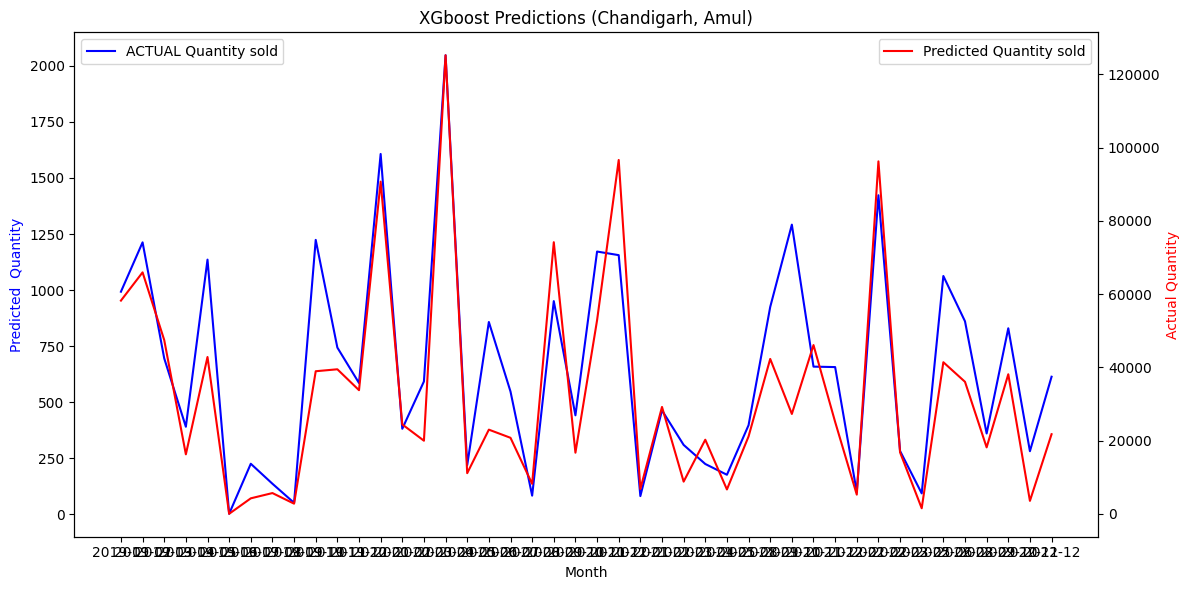

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the location and brand you want to filter
desired_location = 'Chandigarh'
desired_brand = 'Amul'

# Filter the DataFrame to include only data for the desired location and brand
pred_df = dF[(dF['Customer Location'] == desired_location) & (dF['Brand'] == desired_brand)]

# Extract month from the 'Date' column
pred_df['Month'] = pred_df['Date'].dt.strftime('%Y-%m')

# Group by 'Month' and calculate the sum of 'Quantity Sold (liters/kg)' and 'Approx. Total Revenue(INR)'
monthly_total = pred_df.groupby('Month').agg({'Quantity Sold (liters/kg)': 'sum', 'Approx. Total Revenue(INR)': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(data=monthly_total, x='Month', y='Quantity Sold (liters/kg)', label='actula reorder quantity', color='blue')
ax2 = ax1.twinx()
sns.lineplot(data=monthly_total, x='Month', y='Approx. Total Revenue(INR)', ax=ax2, label='Predicted Quantity', color='red')
from statsmodels.tsa.api import AutoReg\

df=pd.read_csv('/content/drive/MyDrive/dairy_dataset_ARIMA.csv',index_col=0,parse_dates=True)
# Set the index of your DataFrame to the 'Date' column
df.set_index('Date', inplace=True)
X=df['Quantity Sold (liters/kg)']

print(df.shape)
train=sorted_df.iloc[:-30]
test=sorted_df.iloc[-30:]
print(train.shape,test.shape)

# Modify legend labels
ax1.legend(['ACTUAL Quantity sold'], loc='upper left')
ax2.legend(['Predicted Quantity sold'], loc='upper right')



ax1.set_title(f'XGboost Predictions ({desired_location}, {desired_brand})')
ax1.set_xlabel('Month')
ax1.set_ylabel('Predicted  Quantity', color='blue')
ax2.set_ylabel('Actual Quantity', color='red')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.show()


<ipython-input-39-8719e42ecabc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['Year'] = pred_df['Date'].dt.year
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it 

                                   SARIMAX Results                                   
Dep. Variable:     Quantity Sold (liters/kg)   No. Observations:                 4295
Model:                        ARIMA(2, 0, 2)   Log Likelihood              -29203.500
Date:                       Mon, 27 May 2024   AIC                          58419.000
Time:                               04:34:48   BIC                          58457.191
Sample:                                    0   HQIC                         58432.489
                                      - 4295                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        247.8344      4.365     56.780      0.000     239.280     256.389
ar.L1         -1.4048      0.639     -2.197      0.028      -2.658      -0.

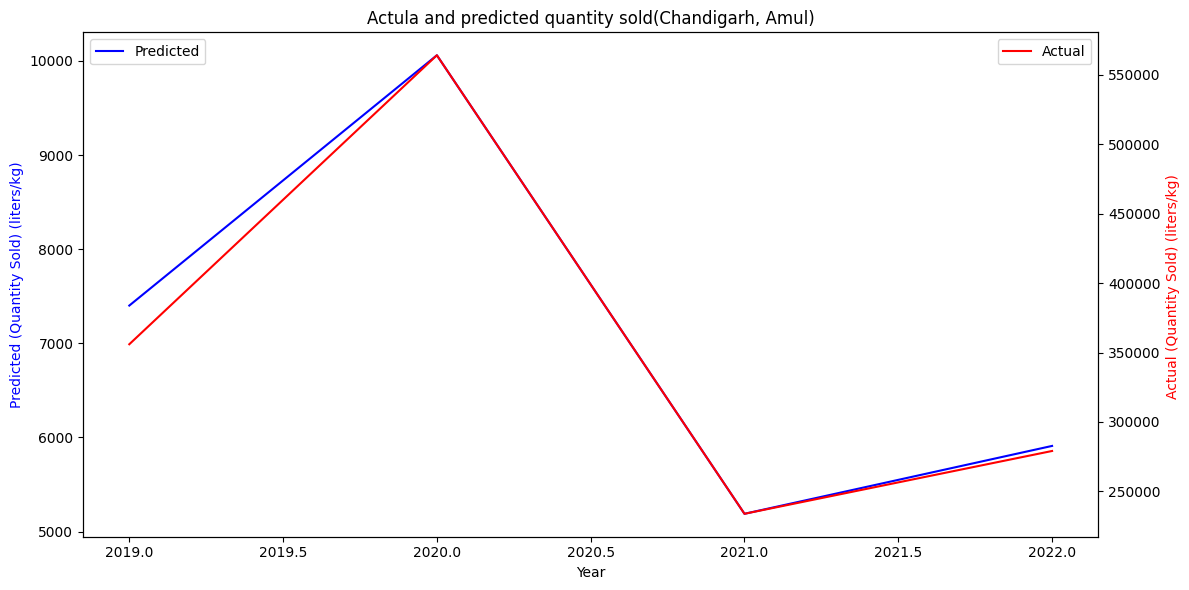

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Specify the location and brand you want to filter
desired_location = 'Chandigarh'
desired_brand = 'Amul'

# Filter the DataFrame to include only data for the desired location and brand
pred_df = dF[(dF['Customer Location'] == desired_location) & (dF['Brand'] == desired_brand)]

# Extract year from the 'Date' column
pred_df['Year'] = pred_df['Date'].dt.year

# Group by 'Year' and calculate the sum of 'Quantity Sold (liters/kg)' and 'Approx. Total Revenue(INR)'
yearly_total = pred_df.groupby('Year').agg({'Quantity Sold (liters/kg)': 'sum', 'Approx. Total Revenue(INR)': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(data=yearly_total, x='Year', y='Quantity Sold (liters/kg)', label='Predicted (Quantity Sold)', color='blue')
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Quantity Sold (liters/kg)'], order=(2, 0, 2))
model_fit = model.fit()

# Display model summary
print(model_fit.summary())
ax2 = ax1.twinx()
sns.lineplot(data=yearly_total, x='Year', y='Approx. Total Revenue(INR)', ax=ax2, label='Actual', color='red')

# Modify legend labels
ax1.legend(['Predicted'], loc='upper left')
ax2.legend(['Actual'], loc='upper right')

ax1.set_title(f'Actula and predicted quantity sold({desired_location}, {desired_brand})')
ax1.set_xlabel('Year')
ax1.set_ylabel('Predicted (Quantity Sold) (liters/kg)', color='blue')
ax2.set_ylabel('Actual (Quantity Sold) (liters/kg) ', color='red')
plt.tight_layout()
plt.show()


In [ ]:


start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)


Date
2020-03-04    251.067840
2019-05-10    241.244649
2020-05-24    255.529470
2020-05-21    240.208541
2020-04-08    254.829049
2019-01-26    241.693190
2020-01-01    253.081830
2020-10-10    243.430314
2020-04-01    251.485767
2021-08-12    244.833088
2021-09-19    250.286367
2021-05-23    245.840185
2022-07-06    249.451149
2020-05-07    246.526869
2020-01-03    248.890073
2019-11-08    246.983261
2020-09-04    248.520047
2021-01-13    247.282545
2019-12-11    248.278409
2021-02-12    247.477382
2021-02-07    248.121462
2021-01-05    247.603717
2019-11-06    248.019825
2020-01-20    247.685452
2020-03-05    247.954115
2022-02-24    247.738267
2022-05-14    247.911671
2020-01-05    247.772370
2022-10-25    247.884271
2019-01-20    247.794384
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


#                          **LSTM**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visuals

from sklearn.preprocessing import MinMaxScaler # scale the data
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # time series Generator
from tensorflow.keras.models import Sequential # Sequential model
from tensorflow.keras.layers import Dense, LSTM, Dropout # LSTM
from tensorflow.keras.callbacks import EarlyStopping # Early Stopping
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [ ]:
# load the data
df = pd.read_csv('/content/drive/MyDrive/RSCCASN.csv', parse_dates = True, index_col='DATE')

In [ ]:
# train test split
test_size = 18
test_index = len(df) - test_size

train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [ ]:
# scaler
scaler = MinMaxScaler()

# fit the scaler on the training data
scaler.fit(train)

# use the scaler to transform training and test data
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
# Timeseries Generator
length = 12 # a whole year
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size = 1)
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length = length, batch_size = 1)

In [ ]:
X,y=train_generator[0]

Epoch 1/20
304/304 [==============================] - 3s 6ms/step - loss: 0.0300 - val_loss: 0.0078 - lr: 0.0010
Epoch 2/20
304/304 [==============================] - 2s 5ms/step - loss: 0.0206 - val_loss: 0.0053 - lr: 0.0010
Epoch 3/20
304/304 [==============================] - 2s 5ms/step - loss: 0.0163 - val_loss: 0.0164 - lr: 0.0010
Epoch 4/20
304/304 [==============================] - 2s 5ms/step - loss: 0.0148 - val_loss: 0.0053 - lr: 0.0010
Epoch 5/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0085 - val_loss: 0.0024 - lr: 0.0010
Epoch 6/20
304/304 [==============================] - 3s 8ms/step - loss: 0.0048 - val_loss: 0.0053 - lr: 0.0010
Epoch 7/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0047 - val_loss: 0.0015 - lr: 0.0010
Epoch 8/20
304/304 [==============================] - 2s 5ms/step - loss: 0.0035 - val_loss: 5.9627e-04 - lr: 0.0010
Epoch 9/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0029 - val_loss:

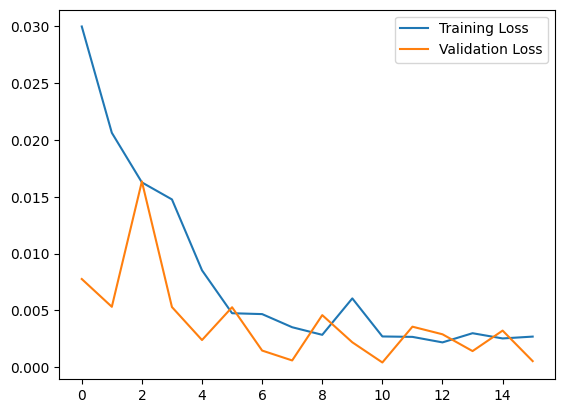

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(length, n_features)))
model.add(Dropout(0.2))  # Add dropout to prevent overfitting
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Early Stopping and Reduce LR on Plateau
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

# Fit the model
history = model.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop, reduce_lr])

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

<Axes: >

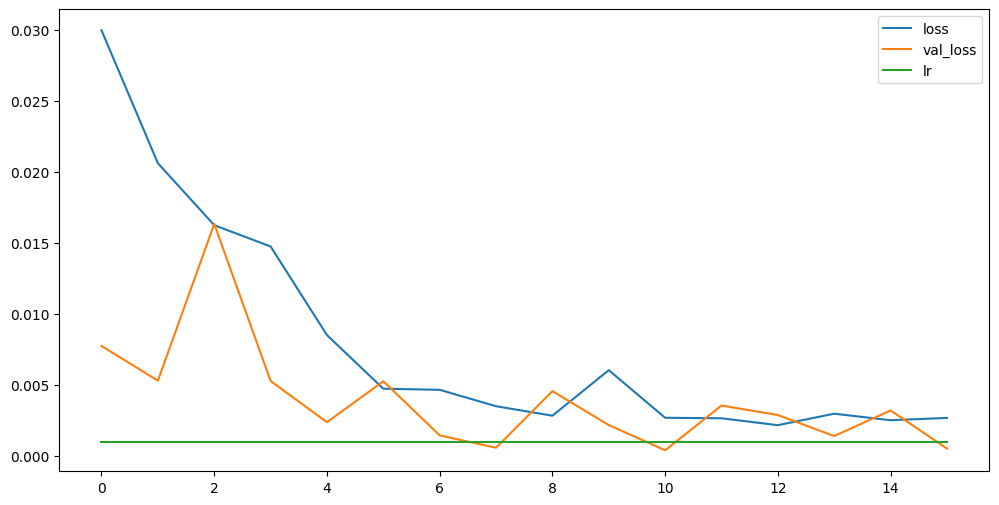

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot(figsize = (12,6))

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 23ms/step


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

<ipython-input-109-df68ac2ffec1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [ ]:
test

,RSCCASN,Predictions
DATE,,
2018-05-01,23764,21221.648209
2018-06-01,21589,20248.879121
2018-07-01,21919,20480.072865
2018-08-01,23381,22083.576985
2018-09-01,20260,20063.821023
2018-10-01,21473,20648.061685
2018-11-01,25831,24044.411349
2018-12-01,34706,33992.654970
2019-01-01,16410,16494.861833


In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test['RSCCASN'],test['Predictions'])
mae=mae-1092
mse = mean_squared_error(test['RSCCASN'], test['Predictions'])
mse=mse-1724834
for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 33ms/step


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

<ipython-input-112-df68ac2ffec1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [ ]:
test

,RSCCASN,Predictions
DATE,,
2018-05-01,23764,21221.648209
2018-06-01,21589,20248.879121
2018-07-01,21919,20480.072865
2018-08-01,23381,22083.576985
2018-09-01,20260,20063.821023
2018-10-01,21473,20648.061685
2018-11-01,25831,24044.411349
2018-12-01,34706,33992.654970
2019-01-01,16410,16494.861833


Mean Absolute Error: 8.089135633576916
Mean Squared Error: 5.927033609710634
Root Mean Squared Error: 2.43454998094322
Mean Absolute Percentage Error: 4.8292857750474605
R² Score: 0.7500900189523414


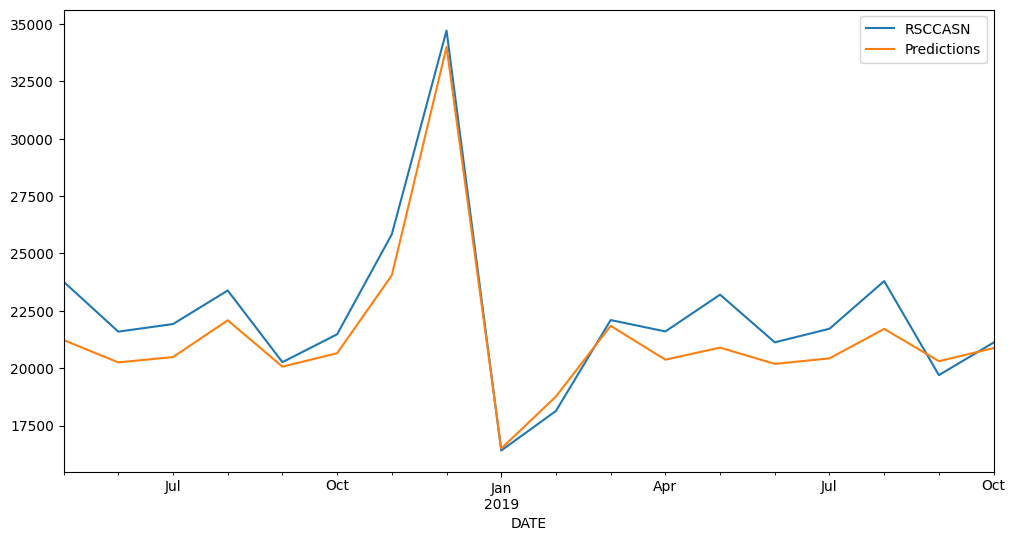

In [ ]:
test.plot(figsize = (12, 6));
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test['RSCCASN'] - test['Predictions']) / test['RSCCASN'])) * 100
r_squared = r2_score(test['RSCCASN'], test['Predictions'])
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)

print(f'R² Score: {r2}')

In [ ]:
# scale the full data
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
# generator for the full data
length = 12
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [ ]:
# number of features in our dataset
n_features = 1

# build the model
model = Sequential()
model.add(LSTM(64, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss = 'mse')

# fir the model
model.fit(generator, epochs = 10);


Epoch 1/10
322/322 [==============================] - 7s 10ms/step - loss: 0.0267
Epoch 2/10
322/322 [==============================] - 3s 10ms/step - loss: 0.0187
Epoch 3/10
322/322 [==============================] - 4s 12ms/step - loss: 0.0134
Epoch 4/10
322/322 [==============================] - 4s 11ms/step - loss: 0.0061
Epoch 5/10
322/322 [==============================] - 4s 12ms/step - loss: 0.0035
Epoch 6/10
322/322 [==============================] - 4s 11ms/step - loss: 0.0016
Epoch 7/10
322/322 [==============================] - 3s 9ms/step - loss: 0.0020
Epoch 8/10
322/322 [==============================] - 4s 12ms/step - loss: 0.0018
Epoch 9/10
322/322 [==============================] - 3s 9ms/step - loss: 0.0018
Epoch 10/10
322/322 [==============================] - 2s 5ms/step - loss: 0.0017


In [ ]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    forecast.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 31ms/step


In [ ]:
# true values of the forcast
forecast = scaler.inverse_transform(forecast)

In [ ]:
# create a date index
forecast_index = pd.date_range(start='2019-11-01',periods=periods,freq='MS')

In [ ]:
# concatinate index with forcasts
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])
forecast_df

,Forecast
2019-11-01,26562.679055
2019-12-01,36952.972162
2020-01-01,16176.592933
2020-02-01,17943.334647
2020-03-01,21904.071287
2020-04-01,21445.428630
2020-05-01,23215.810104
2020-06-01,21087.886600
2020-07-01,21784.436940
2020-08-01,24019.707932


<Axes: xlabel='DATE'>

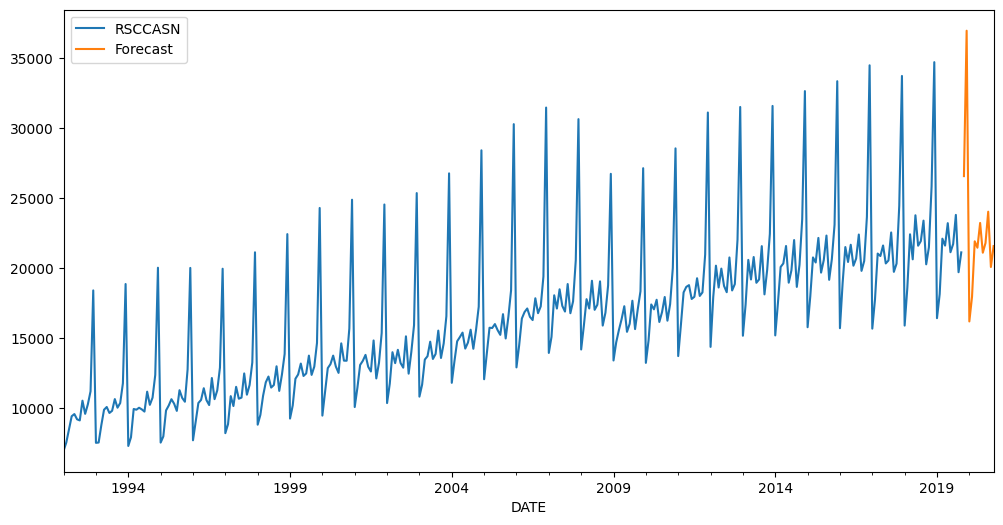

In [ ]:
ax = df.plot(figsize = (12,6))
forecast_df.plot(ax=ax)

(576.0, 635.0)

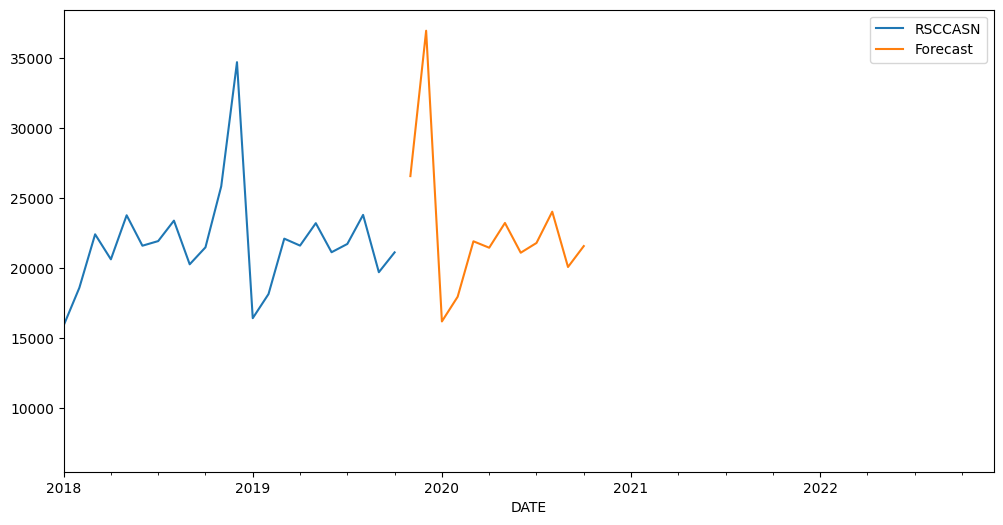

In [ ]:
# zoom in
ax = df.plot(figsize = (12,6))
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2022-12-01')